## Problem statement

Compare performance of a neural network (MultiLayerPerceptron from Scikit Learn) with Logistic Regression.

The models will be trained to identify handwritten digits from the MNIST dataset.

In [185]:
# Libraries
import pandas as pd
from pandas import DataFrame
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import random

## MNIST data

In [4]:
# Import data
df = pd.read_csv("mnist.csv")

In [5]:
# Shape of data
df.shape

(42000, 785)

In [41]:
# Convert to numpy
X = df.iloc[:, 1:].values # .values is the new method which replaces .as_matrix()
y = df.iloc[:, 0].values

In [42]:
# Train / test split
train_pc = 0.8
train_maxrow = int(len(X)*train_pc)
X_train = X[:train_maxrow, :]
X_test = X[train_maxrow:, :]
y_train = y[:train_maxrow]
y_test = y[train_maxrow:]

In [46]:
# Number of train and test examples
# (nb: using new string printing syntax..p>=Python 3.6)
train_len = len(X_train)
test_len = len(X_test)
f"There are {train_len} training examples and {test_len} test examples."

'There are 33600 training examples and 8400 test examples.'

In [182]:
# Function to visualize MNIST digits
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation="nearest")
    return plt

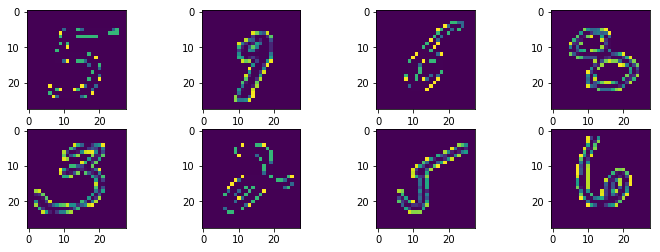

In [198]:
# Show a random selection of digits
fig = plt.figure(figsize=(12, 4))
im_ids = [random.randint(0,len(X)) for i in range(8)]
n = 1
for i in im_ids:
    fig.add_subplot(2,4,n)
    gen_image(X[i])
    n+=1

Target labels are evenly distributed across train and test datasets:

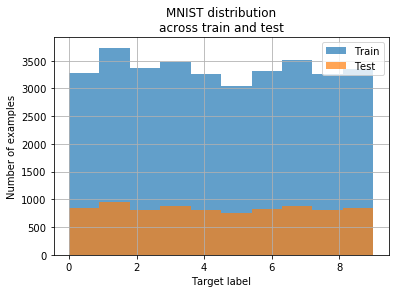

In [63]:
# Plot train and test distributions
fig, ax = plt.subplots()
ax.hist(y_train, label="Train", alpha=0.7)
ax.hist(y_test, label="Test", alpha=0.7)
plt.xlabel("Target label")
plt.ylabel("Number of examples")
plt.title("MNIST distribution\nacross train and test")
plt.grid()
plt.legend()

## Modeling

### Logistic Regression

In [64]:
# Import library
from sklearn.linear_model import LogisticRegression

In [108]:
# Set algorithm parameters
clf_logreg = LogisticRegression(random_state=42,
                               solver="lbfgs",
                               multi_class="multinomial")
clf_logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
# Train model to learn model parameters (weights)
clf_logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
# Evaluate model on test dataset
clf_logreg_meanacc = clf_logreg.score(X_test, y_test)
"Mean accuracy on test set across all classes of Logistic Regression: {:0.2f}%".format(clf_logreg_meanacc*100)

'Mean accuracy on test set across all classes of Logistic Regression: 91.52%'

### Multi-Layer Perceptron

In [94]:
# Import library
from sklearn.neural_network import MLPClassifier

In [100]:
# Set algorithm parameters
# nb: default activation in hidden layers is relu, with softmax applied at output layer
clf_mlp = MLPClassifier(random_state=42,
                       solver="lbfgs",
                       alpha=1e-5,
                       hidden_layer_sizes=(300, 100),
                       learning_rate_init=0.001,
                       verbose=True)
clf_mlp

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [101]:
# Train model to learn parameters (weights)
clf_mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [150]:
clf_mlp.hidden_layer_sizes

(300, 100)

In [105]:
# Evaluate model on test dataset
clf_mlp_meanacc = clf_mlp.score(X_test, y_test)
"Mean accuracy on test set across all classes of MLP: {:0.2f}%".format(clf_mlp_meanacc*100)

'Mean accuracy on test set across all classes of MLP: 96.24%'

## Summary

MLP achieves a lower overall error than Logistic Regression. Hyperparameter tuning could reduce the error further.

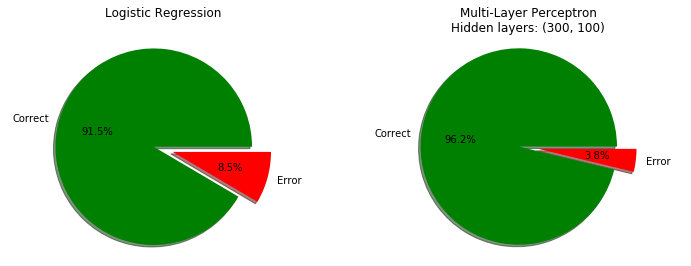

In [154]:
# Pie chart of overall accuracy:

fig = plt.figure(figsize=(12,4))
labels = 'Correct', 'Error'
sizes = [clf_logreg_meanacc, 1-clf_logreg_meanacc]
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig.add_subplot(121)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0, colors=["green", "red"])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Logistic Regression\n")

fig.add_subplot(122)
labels = 'Correct', 'Error'
sizes = [clf_mlp_meanacc, 1-clf_mlp_meanacc]
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0, colors=["green", "red"])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Multi-Layer Perceptron\nHidden layers: %s" % str(clf_mlp.hidden_layer_sizes))

plt.show()